**Author:** Prof. AJ Smit

Department of Biodiversity and Conservation Biology

University of the Western Cape

# Environmental distances

## Set up the analysis environment

In [1]:
library(vegan)
library(ggplot2)
library(geodist) # for calculating geographical distances between lats/lons
library(ggpubr) # to arrange the multipanel graphs

Loading required package: permute

Loading required package: lattice

This is vegan 2.5-7



## Toy data

The toy data have arbitrary columns to demonstrate the Euclidian distance calculation in the lecture slides:

$$ d(a,b) = \sqrt{(a_x - b_x)^2 + (a_y - b_y)^2 + (a_z - b_z)^2} $$

The distance is found between every pair of points named __*a*__ to __*g*__ whose locations are marked by the 'coordinates' $x$, $y$, and $z$---i.e. this is an example of 3-dimensional data (a space or volume, as opposed to 2D data situated on a $x$, $y$ place). We might also call each coordinate a 'variable' (sometimes called a 'dimension') and hence we have multivariate or multidimensional data.

Let's load the dataset and find the size of the dataframe:

In [2]:
xyz <- read.csv("/Users/ajsmit/Dropbox/R/workshops/Quantitative_Ecology/_GitBook/data/Euclidian_dustance_demo_data_xyz.csv")
dim(xyz)

[1] 7 4

There are seven rows and four columns.

The data look like:

In [3]:
xyz

site,x,y,z
<chr>,<int>,<int>,<int>
a,4,1,3
b,5,5,5
c,6,6,4
d,1,4,9
e,2,3,8
f,8,3,1
g,9,1,5


The first column contains the site names and it must be excluded from subsequent calcultions. The remaining three columns will be used below.

Calculate the Euclidian distance using **vegan**'s `vegdist()` function and view the lower triangle with the diagonal:

In [4]:
xyz_euc <- round(vegdist(xyz[, 2:4], method = "euclidian", upper = FALSE, diag = TRUE), 4) # select only cols 2, 3 and 4
xyz_euc

        1       2       3       4       5       6       7
1  0.0000                                                
2  4.5826  0.0000                                        
3  5.4772  1.7321  0.0000                                
4  7.3485  5.7446  7.3485  0.0000                        
5  5.7446  4.6904  6.4031  1.7321  0.0000                
6  4.8990  5.3852  4.6904 10.6771  9.2195  0.0000        
7  5.3852  5.6569  5.9161  9.4340  7.8740  4.5826  0.0000

Convert to a dataframe and view it:

In [5]:
xyz_df <- as.data.frame(round(as.matrix(xyz_euc), 4))
xyz_df

,1,2,3,4,5,6,7
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.0000,4.5826,5.4772,7.3485,5.7446,4.8990,5.3852
2,4.5826,0.0000,1.7321,5.7446,4.6904,5.3852,5.6569
3,5.4772,1.7321,0.0000,7.3485,6.4031,4.6904,5.9161
4,7.3485,5.7446,7.3485,0.0000,1.7321,10.6771,9.4340
5,5.7446,4.6904,6.4031,1.7321,0.0000,9.2195,7.8740
6,4.8990,5.3852,4.6904,10.6771,9.2195,0.0000,4.5826
7,5.3852,5.6569,5.9161,9.4340,7.8740,4.5826,0.0000


Distance matirices have the same properties as dissimilarity matrices, i.e.:

i. The distance matrix is square (number rows = number columns).

ii. The diagonal is filled with 0.

iii. The matrix is symetrical---it is comprised of symetrical upper and lower triangles.

In terms of the meaning of the cell values, their interpretation is also analogous with that of the species dissimilarities. A value of 0 means the properties of the sites (or sections, plots, transects, quadrats, etc.) in terms of their environmental conditions are identical (this is always the case the the diagonal). The larger the numer (which may be >1) the more different sites are in terms of their environmental conditions.

Since each column, $x$, $y$, and $z$, is a variable, we can substitute them for *actual* variables or properties of the environment within which species are present. Let load such data (again fictitious):

In [6]:
env_fict <- read.csv("/Users/ajsmit/Dropbox/R/workshops/Quantitative_Ecology/_GitBook/data/Euclidian_dustance_demo_data_env.csv")
head(env_fict, 2) # print first two rows only

,site,temperature,depth,light
,<chr>,<int>,<int>,<int>
1,a,4,1,3
2,b,5,5,5


These are the same data as in `Euclidian_dustance_demo_data_xyz.csv` but I simply renamed the columns to names of the variables temperature, depth, and light intensity. I won't repeat the analysis here as everything remains the same.

Now, let use some real data.

## A look at the seaweed environmental data

These data accompany the analysis of the South African seaweed flora (see Smit et al. 2017).

In [7]:
load("/Users/ajsmit/Dropbox/R/workshops/Quantitative_Ecology/exercises/diversity/SeaweedEnv.RData")

# lets look at the data
dim(env)

[1] 58 18

We see that the data have 58 rows and 18 columns... the same number of rows as the `seaweed.csv` data. What is in the first five rows?

In [8]:
round(env[1:5, 1:5], 4)

,febMean,febMax,febMed,febX95,febRange
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,13.0012,18.7204,12.6600,16.8097,6.0703
2,13.3795,18.6190,13.1839,17.0724,5.8893
3,13.3616,17.8646,13.2319,16.6111,5.4314
4,13.2897,17.1207,13.1028,16.1214,5.0490
5,12.8113,16.3783,12.4003,15.5324,4.9779


And the last five rows?

In [9]:
round(env[(nrow(env) - 5):nrow(env), (ncol(env) - 5):ncol(env)], 4)

,annRange,febSD,augSD,annChl,augChl,febChl
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
53,4.3707,1.0423,0.7735,4.3420,4.3923,4.6902
54,4.3358,1.1556,0.9104,1.6469,2.2654,1.6930
55,4.4104,1.1988,0.8427,0.2325,0.6001,0.5422
56,4.6089,1.1909,0.6631,0.1321,0.4766,0.3464
57,4.9693,1.1429,0.4994,0.1339,0.5845,0.3185
58,5.5743,1.0000,0.3494,0.1486,0.7363,0.4165


So, each of the rows corresponds to a site (i.e. each of the coastal sections), and the columns each contains an environmental variable. The names of the environmental variables are:

In [10]:
colnames(env)

[1] "febMean"  "febMax"   "febMed"   "febX95"   "febRange" "augMean" 
 [7] "augMin"   "augMed"   "augX5"    "augRange" "annMean"  "annSD"   
[13] "annRange" "febSD"    "augSD"    "annChl"   "augChl"   "febChl"

As we have seen, there are 18 variables (or dimensions). These data are truly multidimensional in a way that far exceeds our brains' limited ability to spatially visualise. For mathematicians these data define an 18-dimensional space, but all we can do is visualise 3-dimensions.

We select only some of the thermal variables; the rest are collinear with some of the ones I import:

In [11]:
env1 <- dplyr::select(env, febMean, febRange, febSD, augMean,
                    augRange, augSD, annMean, annRange, annSD)

## Calculate *z*-scores

Here we need to do something new that was not necessary with the toy data. We calculate *z*-scores, and the process is called 'standardisation'. Standardisation is necessary when the variables are measured in diffrent units---e.g. the unit for temperature is °C whereas Ch-*a* is measured in mg Chl-*a*/m3.

In [12]:
E1 <- round(decostand(env1, method = "standardize"), 4)
E1[1:5, 1:5]

,febMean,febRange,febSD,augMean,augRange
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-1.4915,-0.0443,-0.2713,-1.3765,-0.4735
2,-1.4014,-0.1432,-0.1084,-1.4339,-0.0700
3,-1.4057,-0.3932,-0.1720,-1.5269,0.0248
4,-1.4228,-0.6020,-0.3121,-1.5797,-0.0508
5,-1.5368,-0.6408,-0.4096,-1.5464,-0.0983


## Calculate Euclidian distance

In [13]:
E1_euc <- round(vegdist(E1, method = "euclidian", upper = TRUE), 4)
E1_df <- as.data.frame(as.matrix(E1_euc))
E1_df[1:10, 1:10] # the first 20 rows and columns

,1,2,3,4,5,6,7,8,9,10
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.0000,0.7040,1.0006,1.1132,0.9902,0.9124,0.7849,0.7957,2.7901,2.0327
2,0.7040,0.0000,0.3769,0.6126,0.6553,0.7726,0.6291,0.5565,2.2733,1.7509
3,1.0006,0.3769,0.0000,0.2818,0.4729,0.7594,0.7164,0.7939,2.2692,1.8055
4,1.1132,0.6126,0.2818,0.0000,0.3662,0.7566,0.7911,0.9708,2.4523,1.9019
5,0.9902,0.6553,0.4729,0.3662,0.0000,0.4094,0.5261,0.9860,2.4847,2.1376
6,0.9124,0.7726,0.7594,0.7566,0.4094,0.0000,0.2862,1.0129,2.4449,2.3483
7,0.7849,0.6291,0.7164,0.7911,0.5261,0.2862,0.0000,0.7678,2.3035,2.1656
8,0.7957,0.5565,0.7939,0.9708,0.9860,1.0129,0.7678,0.0000,2.2251,1.5609
9,2.7901,2.2733,2.2692,2.4523,2.4847,2.4449,2.3035,2.2251,0.0000,2.8476


We already know how to read this matrix. Let's plot it as a function of the coastal section's number:

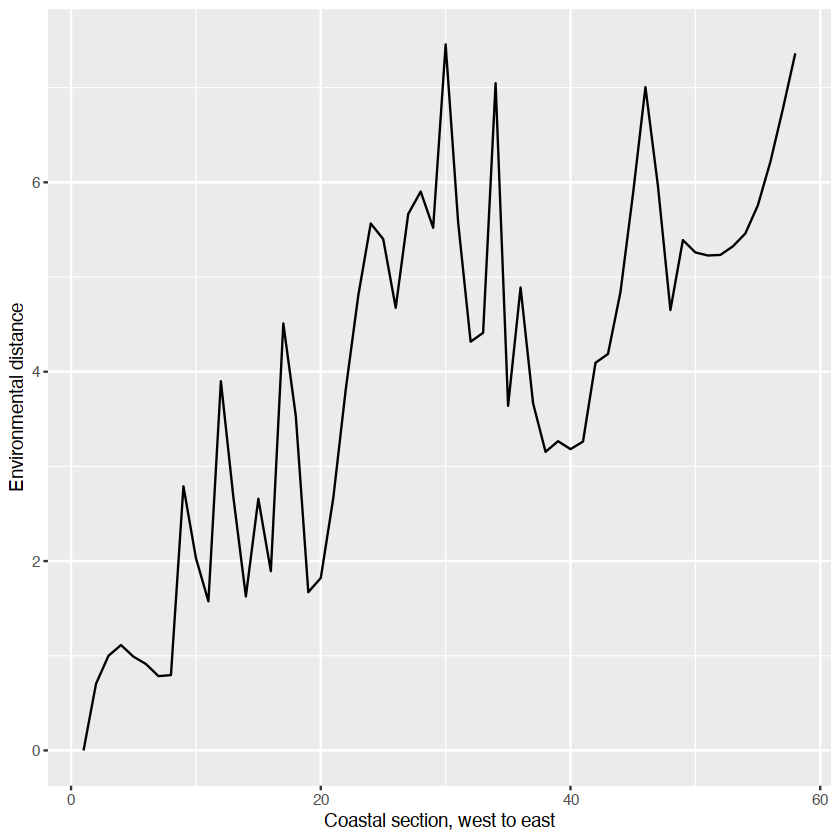

In [14]:
ggplot(data = E1_df, (aes(x = 1:58, y = `1`))) +
  geom_line() + xlab("Coastal section, west to east") + ylab("Environmental distance")

We will explore distance and dissimilarity matrices in more detail in later sections.

## Euclidian distances of geographical data

When we calculate Euclidian distances between geographic lat/lon coordinate, the relationship between sections will be the same (but scaled) as actual geographic distances.

In [15]:
geo <- read.csv("/Users/ajsmit/Dropbox/R/workshops/Quantitative_Ecology/exercises/diversity/sites.csv")
dim(geo)

[1] 58  2

In [16]:
head(geo)

,Latitude,Longitude
,<dbl>,<dbl>
1,-28.98450,16.72429
2,-29.38053,16.94238
3,-29.83253,17.08194
4,-30.26426,17.25928
5,-30.67874,17.47638
6,-31.08580,17.72167


The first column contains nonsense and must be removed:

Calculate geographic distances (in meters) between coordinate pairs:

In [17]:
dists <- geodist(geo, paired = TRUE, measure = "geodesic")
dists_df <- as.data.frame(as.matrix(dists))
colnames(dists_df) <- seq(1:58)
dists_df[1:5, 1:5]

,1,2,3,4,5
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00,48752.45,100201.82,151021.75,201380.00
2,48752.45,0.00,51894.01,102638.03,152849.90
3,100201.82,51894.01,0.00,50822.71,101197.22
4,151021.75,102638.03,50822.71,0.00,50457.53
5,201380.00,152849.90,101197.22,50457.53,0.00


In [18]:
plt1 <- ggplot(data = dists_df, (aes(x = 1:58, y = `1`/1000))) +
  geom_line() + xlab("Coastal section, west to east") + ylab("Distance (km)") + ggtitle("Actual geographic distance")

In [19]:
dists_euc <- vegdist(geo, method = "euclidian")
dists_euc_df <- round(as.data.frame(as.matrix(dists_euc)), 4)
dists_euc_df[1:5, 1:5]

,1,2,3,4,5
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.0000,0.4521,0.9204,1.3871,1.8537
2,0.4521,0.0000,0.4731,0.9388,1.4037
3,0.9204,0.4731,0.0000,0.4667,0.9336
4,1.3871,0.9388,0.4667,0.0000,0.4679
5,1.8537,1.4037,0.9336,0.4679,0.0000


In [20]:
plt2 <- ggplot(data = dists_euc_df, (aes(x = 1:58, y = `1`))) +
  geom_line() + xlab("Coastal section, west to east") + ylab("Euclidian distance") + ggtitle("Euclidian distance")

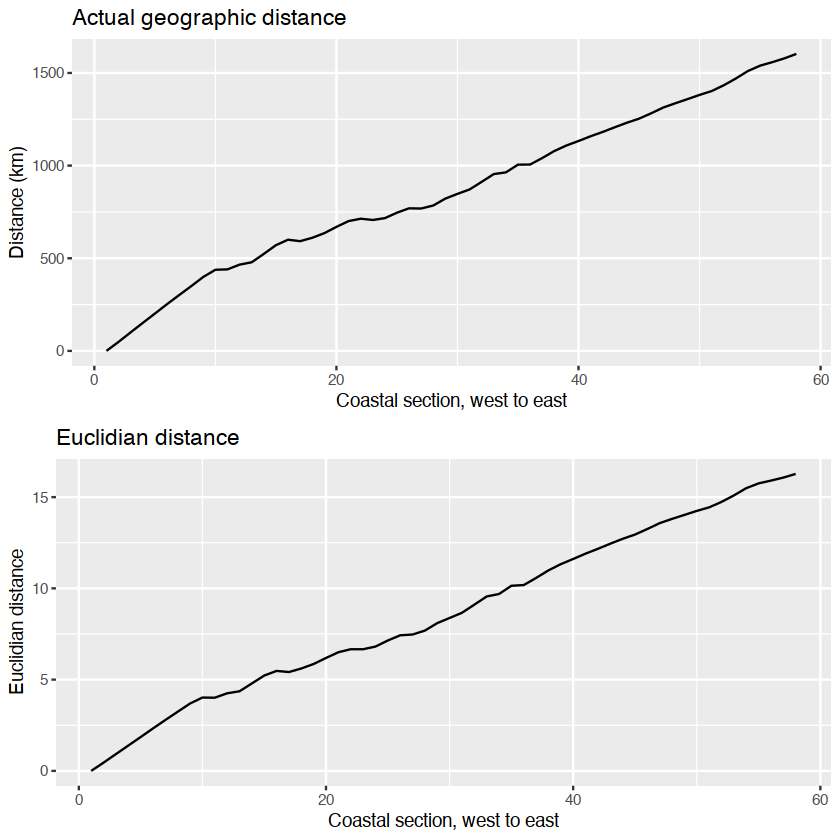

In [21]:
ggarrange(plt1, plt2, nrow = 2)

# References

Smit, A. J., Bolton, J. J., & Anderson, R. J. (2017). Seaweeds in two oceans: beta-diversity. Frontiers in Marine Science, 4, 404.